Explore the csv file produce by the ``experiments.error_analysis.py`` script.

In [1]:
import pandas as pd

df = pd.read_csv(
    "./dev.csv",
    names=["num", "token", "label", "predicted_label", "loss", "scores"],
    index_col=0,
    skiprows=1,
)

In [2]:
df.head(10)

,token,label,predicted_label,loss,scores
num,,,,,
0,['-DOCSTART-'],['O'],['O'],[-0.0],[1.0]
1,"['Datos', 'del', 'paciente', '.']","['O', 'O', 'O', 'O']","['O', 'O', 'O', 'O']","[-0.0, -0.0, -0.0, -0.0]","[1.0, 1.0, 1.0, 1.0]"
2,"['Nombre', ':', 'Pedro', '.']","['O', 'O', 'S-NOMBRE_SUJETO_ASISTENCIA', 'O']","['O', 'O', 'S-NOMBRE_SUJETO_ASISTENCIA', 'O']","[-0.0, -0.0, 1.1920928244535389e-07, -0.0]","[1.0, 1.0, 0.9999998807907104, 1.0]"
3,"['Apellidos', ':', 'De', 'Miguel', 'Rivera', '.']","['O', 'O', 'B-NOMBRE_SUJETO_ASISTENCIA', 'I-NO...","['O', 'O', 'B-NOMBRE_SUJETO_ASISTENCIA', 'I-NO...","[-0.0, -0.0, 2.3841855067985307e-07, 1.4662635...","[1.0, 1.0, 0.9999997615814209, 0.9999853372573..."
4,"['NHC', ':', '2569870', '.']","['O', 'O', 'S-ID_SUJETO_ASISTENCIA', 'O']","['O', 'O', 'S-ID_SUJETO_ASISTENCIA', 'O']","[-0.0, -0.0, 3.576278118089249e-07, -0.0]","[1.0, 1.0, 0.9999996423721313, 1.0]"
5,"['Domicilio', ':', 'Calle', 'Carmen', 'Romero'...","['O', 'O', 'B-CALLE', 'I-CALLE', 'I-CALLE', 'I...","['O', 'O', 'B-CALLE', 'I-CALLE', 'I-CALLE', 'I...","[-0.0, -0.0, 1.1920928244535389e-07, -0.0, -0....","[1.0, 1.0, 0.9999998807907104, 1.0, 1.0, 1.0, ..."
6,"['Localidad', '/', 'Provincia', ':', 'Madrid',...","['O', 'O', 'O', 'O', 'S-TERRITORIO', 'O']","['O', 'O', 'O', 'O', 'S-TERRITORIO', 'O']","[-0.0, -0.0, -0.0, -0.0, 9.65590606938349e-06,...","[1.0, 1.0, 1.0, 1.0, 0.9999903440475464, 1.0]"
7,"['CP', ':', '28035', '.']","['O', 'O', 'S-TERRITORIO', 'O']","['O', 'O', 'S-TERRITORIO', 'O']","[-0.0, -0.0, 1.7881377516459906e-06, -0.0]","[1.0, 1.0, 0.9999982118606567, 1.0]"
8,"['Datos', 'asistenciales', '.']","['O', 'O', 'O']","['O', 'O', 'O']","[-0.0, -0.0, -0.0]","[1.0, 1.0, 1.0]"


Each column element which is originaly a  ``List`` is read as a string by ``Pandas``.  Here our string look like:

In [3]:
df["token"][0]

"['-DOCSTART-']"

In that case, there is a quick method using the ``pd.DataFrame.apply()`` method and ``eval()`` functions.


In [4]:
for column in df.columns:
    df[column] = df[column].apply(eval)

Each column contains a list of tokens, labels, predicted labels, and so on for each sample. Let’s have a look at the tokens individually by unpacking these lists. The ``pan⁠das.Series.explode()`` function allows us to do exactly that in one line by creating a row for each element in the original rows list. Since all the lists in one row have the same length, we can do this in parallel for all columns.

In [5]:
df_tokens = df.apply(pd.Series.explode)
df_tokens.head(10)

,token,label,predicted_label,loss,scores
num,,,,,
0,-DOCSTART-,O,O,-0.0,1.0
1,Datos,O,O,-0.0,1.0
1,del,O,O,-0.0,1.0
1,paciente,O,O,-0.0,1.0
1,.,O,O,-0.0,1.0
2,Nombre,O,O,-0.0,1.0
2,:,O,O,-0.0,1.0
2,Pedro,S-NOMBRE_SUJETO_ASISTENCIA,S-NOMBRE_SUJETO_ASISTENCIA,0.0,1.0
2,.,O,O,-0.0,1.0


With the data in this shape, we can now group it by the input tokens and aggregate the losses for each token with the count, mean, and sum. Finally, we sort the aggregated data by the sum of the losses and see which tokens have accumulated the most loss in the validation set:

In [6]:
(
    df_tokens.groupby("token")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
token,de,.,28,",",-,años,/,pareja,la,meses
count,8197,9086,225,5642,935,589,2153,9,3070,253
mean,0.04,0.02,0.59,0.02,0.12,0.16,0.03,7.11,0.02,0.22
sum,333.942664,171.206013,132.972294,116.021176,115.202537,91.63632,73.132974,64.009445,59.737571,56.392863


We can observe several patterns in this list:

The word “de“ and “.“ has the highest total loss, which is not surprising since they are also the to most common tokens in the list. However, their mean loss is much lower than the other tokens in the list. This means that the model doesn’t struggle to classify them.

TODO: rewriteWords like “in”, “von”, “der”, and “und” appear relatively frequently. They often appear together with named entities and are sometimes part of them, which explains why the model might mix them up.

Some are words that are rarer but have a relatively high average loss. We will investigate them further.

We can also group the label IDs and look at the losses for each class:

In [7]:
(
    df_tokens.groupby("label")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns
    .sort_values(by="mean", ascending=False)
    .reset_index()
    .round(2)
    .head(20)
)

,label,count,mean,sum
0,I-ID_EMPLEO_PERSONAL_SANITARIO,3,24.40,73.199286
1,I-OTROS_SUJETO_ASISTENCIA,5,24.22,121.098469
2,E-ID_EMPLEO_PERSONAL_SANITARIO,1,24.12,24.119164
3,B-ID_EMPLEO_PERSONAL_SANITARIO,1,23.70,23.704376
4,S-CORREO_ELECTRONICO,1,18.97,18.969723
5,B-OTROS_SUJETO_ASISTENCIA,5,17.53,87.661053
6,E-OTROS_SUJETO_ASISTENCIA,5,16.77,83.837723
7,I-PROFESION,3,15.44,46.308018
8,S-OTROS_SUJETO_ASISTENCIA,1,15.27,15.272019
9,S-NOMBRE_PERSONAL_SANITARIO,3,15.11,45.335479


We see that ``I-ID_EMPLEO_PERSONAL_SANITARIO`` has the highest average loss, which means that determining the beginning of an organization poses a challenge to our model.
This is normal as there is only 4 occurrence of this label,

We can break this down further by plotting the confusion matrix of the token classification, where we see that the beginning of an organization is often confused with the subsequent I-ORG token:

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_true, y_preds, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true", labels=labels)
    fig, ax = plt.subplots(figsize=(40, 40))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels, )
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False, xticks_rotation="vertical")
    plt.title("Normalized confusion matrix")
    plt.show()
    return cm

All the labels are not present in the validation sets. Let's select just the labels present in ``df_tokens``.

In [9]:
# label_names = list(model.label_dictionary.item2idx.keys())
label_in_dev = pd.concat([df_tokens["predicted_label"], df_tokens["label"]]).unique()
# assert label_names != label_in_test

Look at the labels that are present in the labels and not in the predicted labels

In [10]:
labels_freq = df_tokens["label"].value_counts()
pd.DataFrame(labels_freq)

,label
O,124320
I-CALLE,2079
I-FECHAS,1732
S-TERRITORIO,865
B-FECHAS,688
...,...
S-OTROS_SUJETO_ASISTENCIA,1
B-ID_EMPLEO_PERSONAL_SANITARIO,1
B-SEXO_SUJETO_ASISTENCIA,1
E-SEXO_SUJETO_ASISTENCIA,1


But there is 6 labels that are are not predicted.

In [11]:
[e for e in df_tokens["label"].unique() if e not in df_tokens["predicted_label"].unique()]

['B-ID_EMPLEO_PERSONAL_SANITARIO',
 'I-ID_EMPLEO_PERSONAL_SANITARIO',
 'E-ID_EMPLEO_PERSONAL_SANITARIO',
 'S-NOMBRE_PERSONAL_SANITARIO',
 'B-SEXO_SUJETO_ASISTENCIA',
 'S-CORREO_ELECTRONICO']

All the predicted labels are in the labels.

In [12]:
pd.DataFrame([e for e in df_tokens["predicted_label"].unique() if e not in df_tokens["label"].unique()], columns=["Predicted label that doesn't exists in labels"])

,Predicted label that doesn't exists in labels


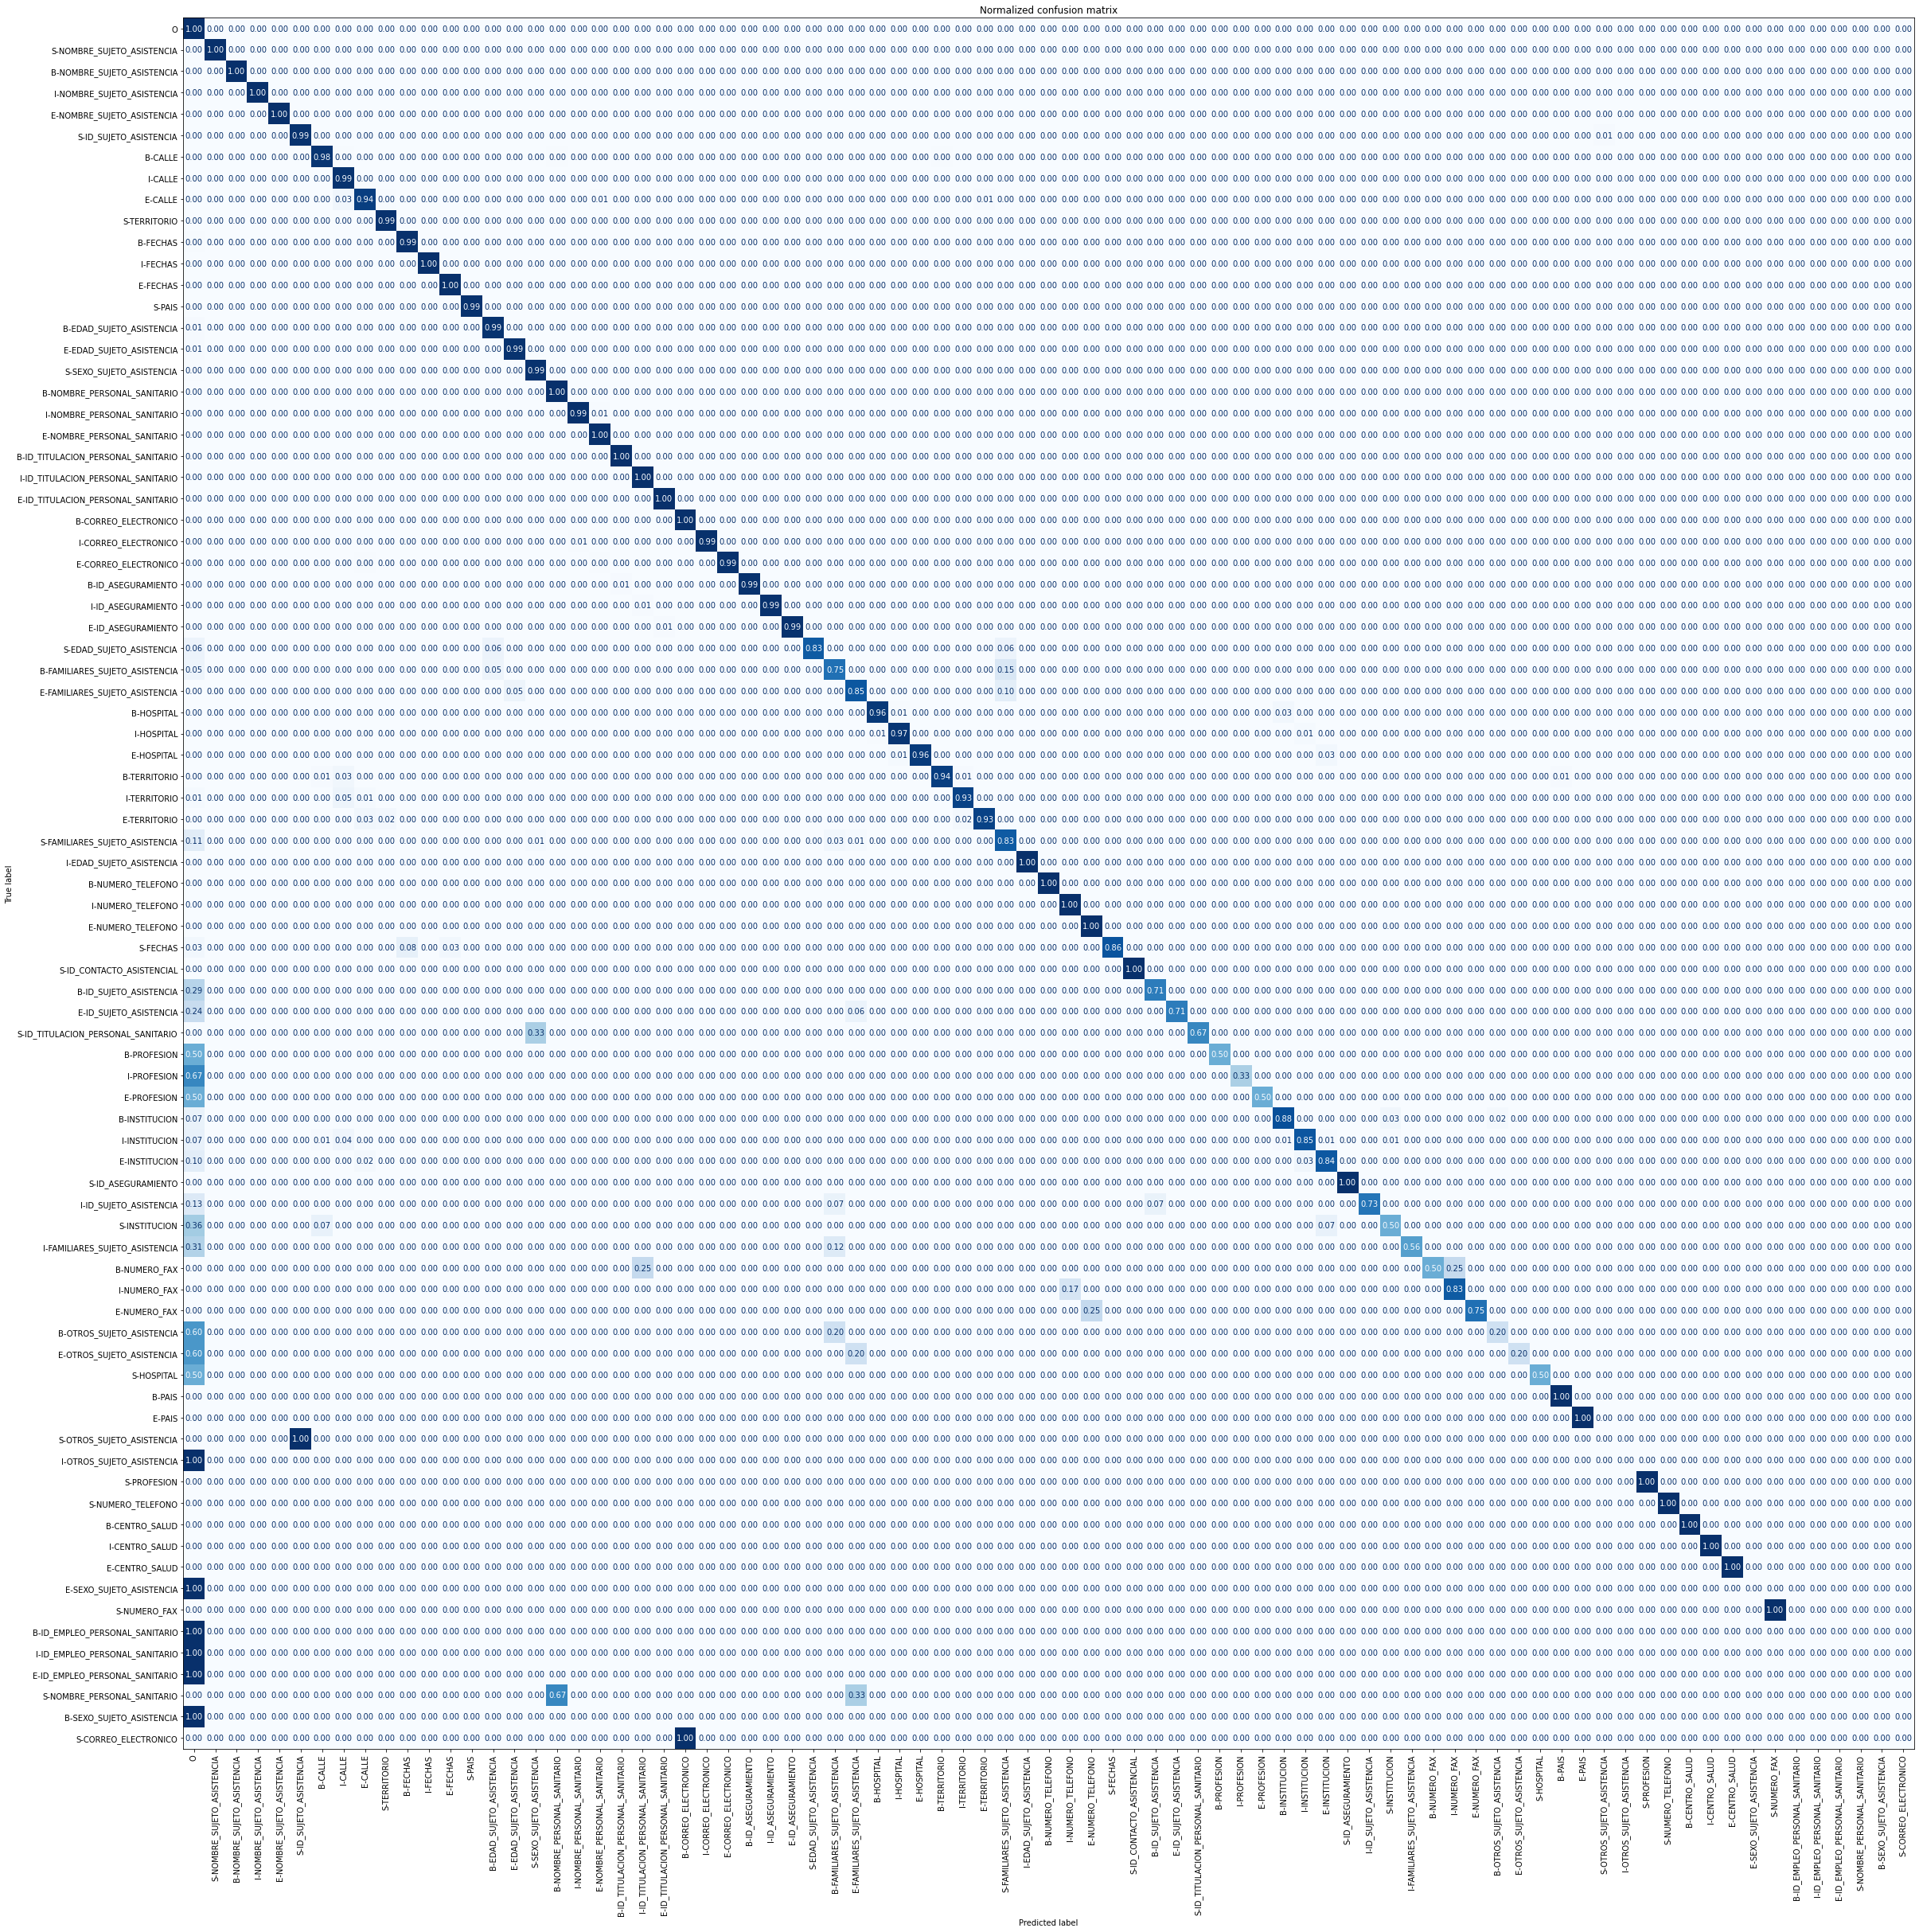

In [13]:
cm = plot_confusion_matrix(df_tokens["label"], df_tokens["predicted_label"], label_in_dev)

Looking at the confusion matrix we can see that there is a lot of False Negative.

TODO From the plot, we can see that our model tends to confuse various entities with the **E-NUMERO-FAX** entities the most. Otherwise, it is quite good at classifying the remaining entities, which is clear by the near diagonal nature of the confusion matrix.

In [14]:
choosen_label = "B-SEXO_SUJETO_ASISTENCIA"
df_E_CALLE = df_tokens[df_tokens["label"] == choosen_label]

In [15]:
df_E_CALLE[df_E_CALLE["predicted_label"] != choosen_label].reset_index()

,num,token,label,predicted_label,loss,scores
0,4924,N,B-SEXO_SUJETO_ASISTENCIA,O,11.655248,0.999021


In [16]:
df_E_CALLE[df_E_CALLE["predicted_label"] == choosen_label]

,token,label,predicted_label,loss,scores
num,,,,,


We can verify that the **B-ID_EMPLEO_PERSONAL_SANITARIO** exist just in the predicted labels but not in the labels.

In [17]:
df_tokens[df_tokens["predicted_label"] == choosen_label]

,token,label,predicted_label,loss,scores
num,,,,,


This is due to the fact that there is labels present in the training sets that are not present in the validation set.

Now that we’ve examined the errors at the token level, let’s move on and look at sequences with high losses. For this calculation, we’ll revisit our “unexploded” DataFrame and calculate the total loss by summing over the loss per token. To do this, let’s first write a function that helps us display the token sequences with the labels and the losses:

In [18]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        labels = row["label"]
        preds = row["predicted_label"]
        tokens = row["token"]
        losses = [f"{loss:.2f}" for loss in row['loss']]
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
                               "preds": preds, "losses": losses}).T
        yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
tokens,Responsable,clínico,:,Dr,.,Lluís,Valerio,Unidad,de,Salud,...,-,mail,:,lvalerio,.,bnm,.,ics@gencat,.,net
labels,O,O,O,O,O,B-NOMBRE_PERSONAL_SANITARIO,I-NOMBRE_PERSONAL_SANITARIO,E-NOMBRE_PERSONAL_SANITARIO,O,B-INSTITUCION,...,O,O,O,B-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,E-CORREO_ELECTRONICO
preds,O,O,O,O,O,B-NOMBRE_PERSONAL_SANITARIO,E-NOMBRE_PERSONAL_SANITARIO,O,O,O,...,O,O,O,B-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,E-CORREO_ELECTRONICO
losses,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,17.07,23.04,-0.00,23.17,...,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
tokens,Se,trata,de,una,familia,de,nueve,miembros,",",con,...,dos,de,los,hermanos,pero,sin,datos,de,DG,.
labels,O,O,O,O,B-FAMILIARES_SUJETO_ASISTENCIA,I-FAMILIARES_SUJETO_ASISTENCIA,I-FAMILIARES_SUJETO_ASISTENCIA,E-FAMILIARES_SUJETO_ASISTENCIA,O,O,...,B-FAMILIARES_SUJETO_ASISTENCIA,I-FAMILIARES_SUJETO_ASISTENCIA,I-FAMILIARES_SUJETO_ASISTENCIA,E-FAMILIARES_SUJETO_ASISTENCIA,O,O,O,O,O,O
preds,O,O,O,O,S-FAMILIARES_SUJETO_ASISTENCIA,O,B-FAMILIARES_SUJETO_ASISTENCIA,E-FAMILIARES_SUJETO_ASISTENCIA,O,O,...,O,O,O,S-FAMILIARES_SUJETO_ASISTENCIA,O,O,O,O,O,O
losses,-0.00,-0.00,-0.00,-0.00,10.51,22.38,12.51,0.00,-0.00,-0.00,...,21.75,22.16,22.17,15.87,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
tokens,Responsable,clínico,:,Maria,Subirana,Domènech,Institut,de,Medicina,Legal,...,.,Barcelona,08014,E,-,mail,:,25402msd@comb,.,cat
labels,O,O,O,B-NOMBRE_PERSONAL_SANITARIO,I-NOMBRE_PERSONAL_SANITARIO,E-NOMBRE_PERSONAL_SANITARIO,B-INSTITUCION,I-INSTITUCION,I-INSTITUCION,I-INSTITUCION,...,O,S-TERRITORIO,S-TERRITORIO,O,O,O,O,B-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,E-CORREO_ELECTRONICO
preds,O,O,O,B-NOMBRE_PERSONAL_SANITARIO,I-NOMBRE_PERSONAL_SANITARIO,E-NOMBRE_PERSONAL_SANITARIO,B-INSTITUCION,I-INSTITUCION,I-INSTITUCION,I-INSTITUCION,...,O,S-TERRITORIO,S-TERRITORIO,O,O,O,O,B-CORREO_ELECTRONICO,I-CORREO_ELECTRONICO,E-CORREO_ELECTRONICO
losses,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00


Look also at the f1 score in order to verify that the previous scores compute from `` Flair`` and the evaluation function are correct.

In [30]:
from sklearn.metrics import f1_score

f1_score(df_tokens["label"], df_tokens["predicted_label"], average="micro")

0.9970086083213773